**Github link**: [https://github.com/ShazaHabiballah/Tree_Classification](https://github.com/ShazaHabiballah/Tree_Classification)

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [112]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

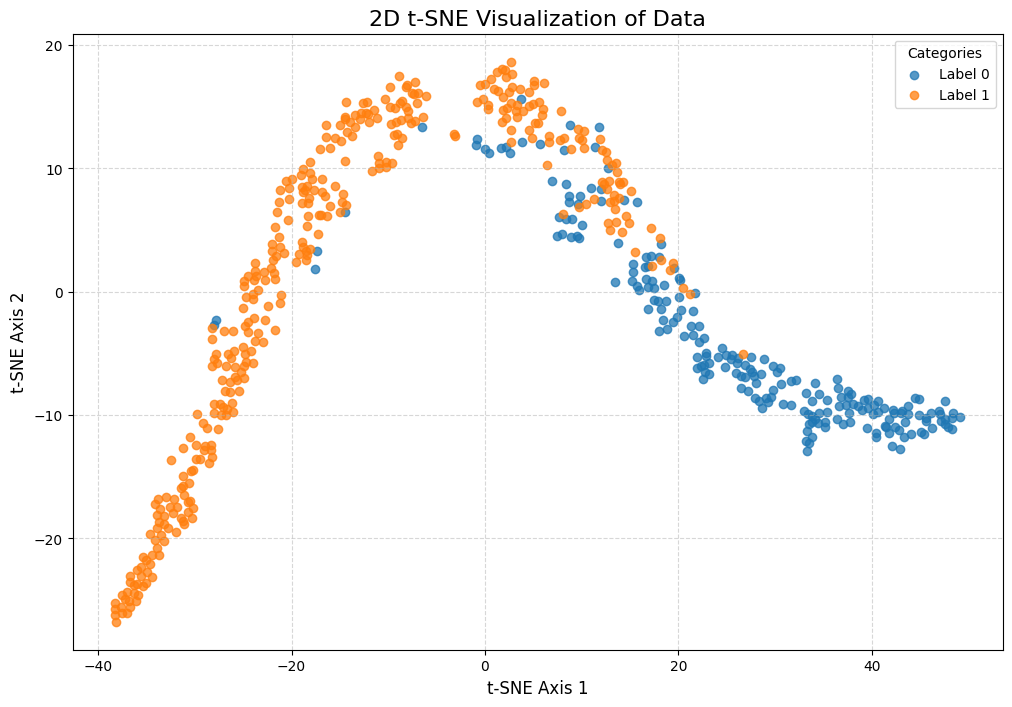

In [113]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def tnse_visulization(data, labels, plot_title="Breast Cancer Data Visiulaization", size=(12, 8)):

    tsne_model = TSNE(n_components=2)
    reduced_data = tsne_model.fit_transform(data)

    tsne_results = pd.DataFrame({
        'Dim1': reduced_data[:, 0],
        'Dim2': reduced_data[:, 1],
        'Class': labels
    })

    plt.figure(figsize=size)
    unique_classes = sorted(tsne_results['Class'].unique())

    for class_type in unique_classes:
        class_points = tsne_results[tsne_results['Class'] == class_type]
        plt.scatter(
            class_points['Dim1'],
            class_points['Dim2'],
            label=f"Label {class_type}",
            alpha=0.75
        )

    plt.title(plot_title, fontsize=16)
    plt.xlabel("t-SNE Axis 1", fontsize=12)
    plt.ylabel("t-SNE Axis 2", fontsize=12)
    plt.legend(title="Categories", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

tnse_visulization(my_data.data, my_data.target, plot_title="2D t-SNE Visualization of Data")


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [114]:

from sklearn.model_selection import train_test_split

test_size = 0.3
random_state=123
data, target = my_data.data, my_data.target
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=test_size, random_state=random_state)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [115]:
from sklearn.tree import DecisionTreeClassifier

def train_and_predict_decision_tree(X_train, Y_train, X_test, max_depth=15, min_samples_split=4, min_samples_leaf=2):
    model_decision_tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    model_decision_tree.fit(X_train, Y_train)
    return model_decision_tree.predict(X_test)

y_prediction_dtree = train_and_predict_decision_tree(X_train, Y_train, X_test)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [136]:
from sklearn.ensemble import RandomForestClassifier

def train_and_predict_random_forest(X_train, Y_train, X_test, n_estimators=100, min_samples_split=2, min_samples_leaf=1):
    model_random_forest = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    model_random_forest.fit(X_train, Y_train)
    return model_random_forest.predict(X_test)

y_prediction_random_forest = train_and_predict_random_forest(X_train, Y_train, X_test)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [146]:
from sklearn.ensemble import AdaBoostClassifier

def train_and_predict_adaboost(X_train, Y_train, X_test,n_estimators=50, learning_rate=0.1):
    model_adaboost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model_adaboost.fit(X_train, Y_train)
    return model_adaboost.predict(X_test)

y_prediction_adaboost = train_and_predict_adaboost(X_train, Y_train, X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(Y_test, y_pred, model_name):

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    confusion = confusion_matrix(Y_test, y_pred)

    print("----------------------------")
    print(f"{model_name} Results:")
    print("----------------------------")
    print(f"F_Score: {f1 * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Confusion Matrix:\n{confusion}\n")


evaluate_model(Y_test, y_prediction_dtree, "Decision Tree")
evaluate_model(Y_test, y_prediction_random_forest, "Random Forest")
evaluate_model(Y_test, y_prediction_adaboost, "AdaBoost")

----------------------------
Decision Tree Results:
----------------------------
F_Score: 93.14%
Recall: 92.23%
Precision: 94.06%
Accuracy: 91.81%
Confusion Matrix:
[[62  6]
 [ 8 95]]

----------------------------
Random Forest Results:
----------------------------
F_Score: 97.12%
Recall: 98.06%
Precision: 96.19%
Accuracy: 96.49%
Confusion Matrix:
[[ 64   4]
 [  2 101]]

----------------------------
AdaBoost Results:
----------------------------
F_Score: 97.56%
Recall: 97.09%
Precision: 98.04%
Accuracy: 97.08%
Confusion Matrix:
[[ 66   2]
 [  3 100]]

